In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [0]:
url = 'https://raw.githubusercontent.com/consta35/thd/master/Model_DataSet.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,Unnamed: 0,Hash_Trans_ID,PRO,SKU_ID,Transaction_Date_ID,Transaction_Hour_ID,Online_Order_Type_Desc,POS_Sales,POS_UnitsSold,Department_ID,Class_ID,SubClass_ID,Dept_11,Dept_13,Dept_16,Dept_17,Dept_21,Dept_22,Dept_23,Dept_24,Dept_25,Dept_26,Dept_27,Dept_28,Dept_29,Dept_30,Dept_59,Dept_78
0,0,0000bb03239052a594e2f415b0d2643b8d498ae0,0,1.0,1,153217,1,106.92,3.0,1,1,1,0.0,0.0,0.0,0.0,0.0,106.92,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0005b97485fac2f1027d049dbab9484354d599c9,1,2.0,1,113926,1,213.96,3.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,213.96,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0006d7dd4c3fd47287aca3bbeb1976cb4edc4a7d,0,2.0,1,83123,1,147.36,2.0,1,1,2,0.0,0.0,0.0,0.0,0.0,147.36,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,000804cdaf4d7cc1fdf80dffe49294a0038c0ee3,1,1.0,1,115908,1,-209.94,-1.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,-209.94,0.0,0.0,0.0,0.0,0.0,0.0
4,4,000910b9b7e93578aaf6d19ae923d4dfe0bac76d,1,3.0,1,114230,1,602.16,5.0,2,2,3,0.0,0.0,0.0,0.0,0.0,0.00,359.46,242.7,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
list(data.columns)

['Unnamed: 0',
 'Hash_Trans_ID',
 'PRO',
 'SKU_ID',
 'Transaction_Date_ID',
 'Transaction_Hour_ID',
 'Online_Order_Type_Desc',
 'POS_Sales',
 'POS_UnitsSold',
 'Department_ID',
 'Class_ID',
 'SubClass_ID',
 'Dept_11',
 'Dept_13',
 'Dept_16',
 'Dept_17',
 'Dept_21',
 'Dept_22',
 'Dept_23',
 'Dept_24',
 'Dept_25',
 'Dept_26',
 'Dept_27',
 'Dept_28',
 'Dept_29',
 'Dept_30',
 'Dept_59',
 'Dept_78']

In [0]:
X = data[[
'SKU_ID',
 'Transaction_Date_ID',
 'Transaction_Hour_ID',
 'Online_Order_Type_Desc',
 'POS_Sales',
 'POS_UnitsSold',
 'Department_ID',
 'Class_ID',
 'SubClass_ID',
 'Dept_11',
 'Dept_13',
 'Dept_16',
 'Dept_17',
 'Dept_21',
 'Dept_22',
 'Dept_23',
 'Dept_24',
 'Dept_25',
 'Dept_26',
 'Dept_27',
 'Dept_28',
 'Dept_29',
 'Dept_30',
 'Dept_59',
 'Dept_78']]
y = data['PRO']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32)

In [83]:
rfc = RandomForestClassifier(n_estimators=20, n_jobs = -2, random_state = 42)
rfc.fit(X_train,  y_train)
    
# Predict the labels of the test set: y_pred
y_pred = rfc.predict(X_test)

    # Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9 11]
 [ 9 21]]
              precision    recall  f1-score   support

           0       0.50      0.45      0.47        20
           1       0.66      0.70      0.68        30

    accuracy                           0.60        50
   macro avg       0.58      0.57      0.58        50
weighted avg       0.59      0.60      0.60        50



# **Precision = True Positive / (True Positive + False Negative)**

### Out of everyone we predicted to be a PRO, how many were actual PROs?

# **Recall = True Positive / (True Positive + False Negative)**

### Out of all the actual PROs, how many did we actually classify correctly?

# **F1 = ((precision*recall)/(precision+recall))**

### F1 Score gives us a balance of precision and recall

In [0]:
fpr, tpr, _= roc_curve(y_test, y_pred)

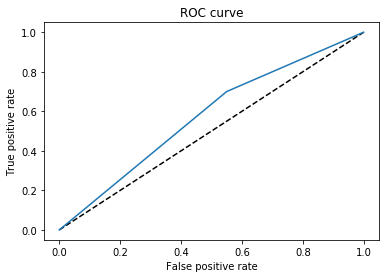

In [85]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [86]:
metrics.auc(fpr, tpr)

0.575

In [0]:
url_imb = 'https://raw.githubusercontent.com/consta35/thd/master/Model_DataSet_IMBALANCED.csv'
data_imb = pd.read_csv(url_imb)

In [21]:
len(data_imb)

200

In [22]:
data_imb.PRO.sum()

30

In [0]:
X_imb = data_imb[[
'SKU_ID',
 'Transaction_Date_ID',
 'Transaction_Hour_ID',
 'Online_Order_Type_Desc',
 'POS_Sales',
 'POS_UnitsSold',
 'Department_ID',
 'Class_ID',
 'SubClass_ID',
 'Dept_11',
 'Dept_13',
 'Dept_16',
 'Dept_17',
 'Dept_21',
 'Dept_22',
 'Dept_23',
 'Dept_24',
 'Dept_25',
 'Dept_26',
 'Dept_27',
 'Dept_28',
 'Dept_29',
 'Dept_30',
 'Dept_59',
 'Dept_78']]
y_imb = data_imb['PRO']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, random_state = 45)

In [72]:
rfc = RandomForestClassifier(n_estimators=250, n_jobs = -2, random_state = 12)
rfc.fit(X_train,  y_train)
    
# Predict the labels of the test set: y_pred
y_pred = rfc.predict(X_test)

    # Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[38  2]
 [10  0]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        40
           1       0.00      0.00      0.00        10

    accuracy                           0.76        50
   macro avg       0.40      0.47      0.43        50
weighted avg       0.63      0.76      0.69        50



In [0]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

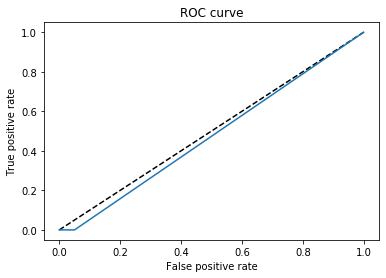

In [74]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [78]:
fpr, tpr, thresholds = metrics.roc_curve(actuals, predictions, pos_label=1)
metrics.auc(fpr, tpr)

0.475